In [1]:
# import pandas
import pandas as pd

# import numpy
import numpy as np

# import seaborn
import seaborn as sb

# import matplotlib
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv(R'/media/nural/New Volume/xdatasets/winequalityN.csv')

In [5]:
df.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6

In [ ]:
df.shape

In [ ]:
df.quality.unique()

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [10]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6487.000000       6489.000000  6494.000000     6495.000000   
mean        7.216579          0.339691     0.318722        5.444326   
std         1.296750          0.164649     0.145265        4.758125   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6495.000000          6497.000000           6497.000000  6497.000000   
mean      0.056042            30.525319            115.744574     0.994697   
std       0.035036            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6488.000000  6493.000000  6497.000000  6497.000000  
mean      3.218395     0.531215    10.491801     5.818378  
std       0.160748     0.148814     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

In [11]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

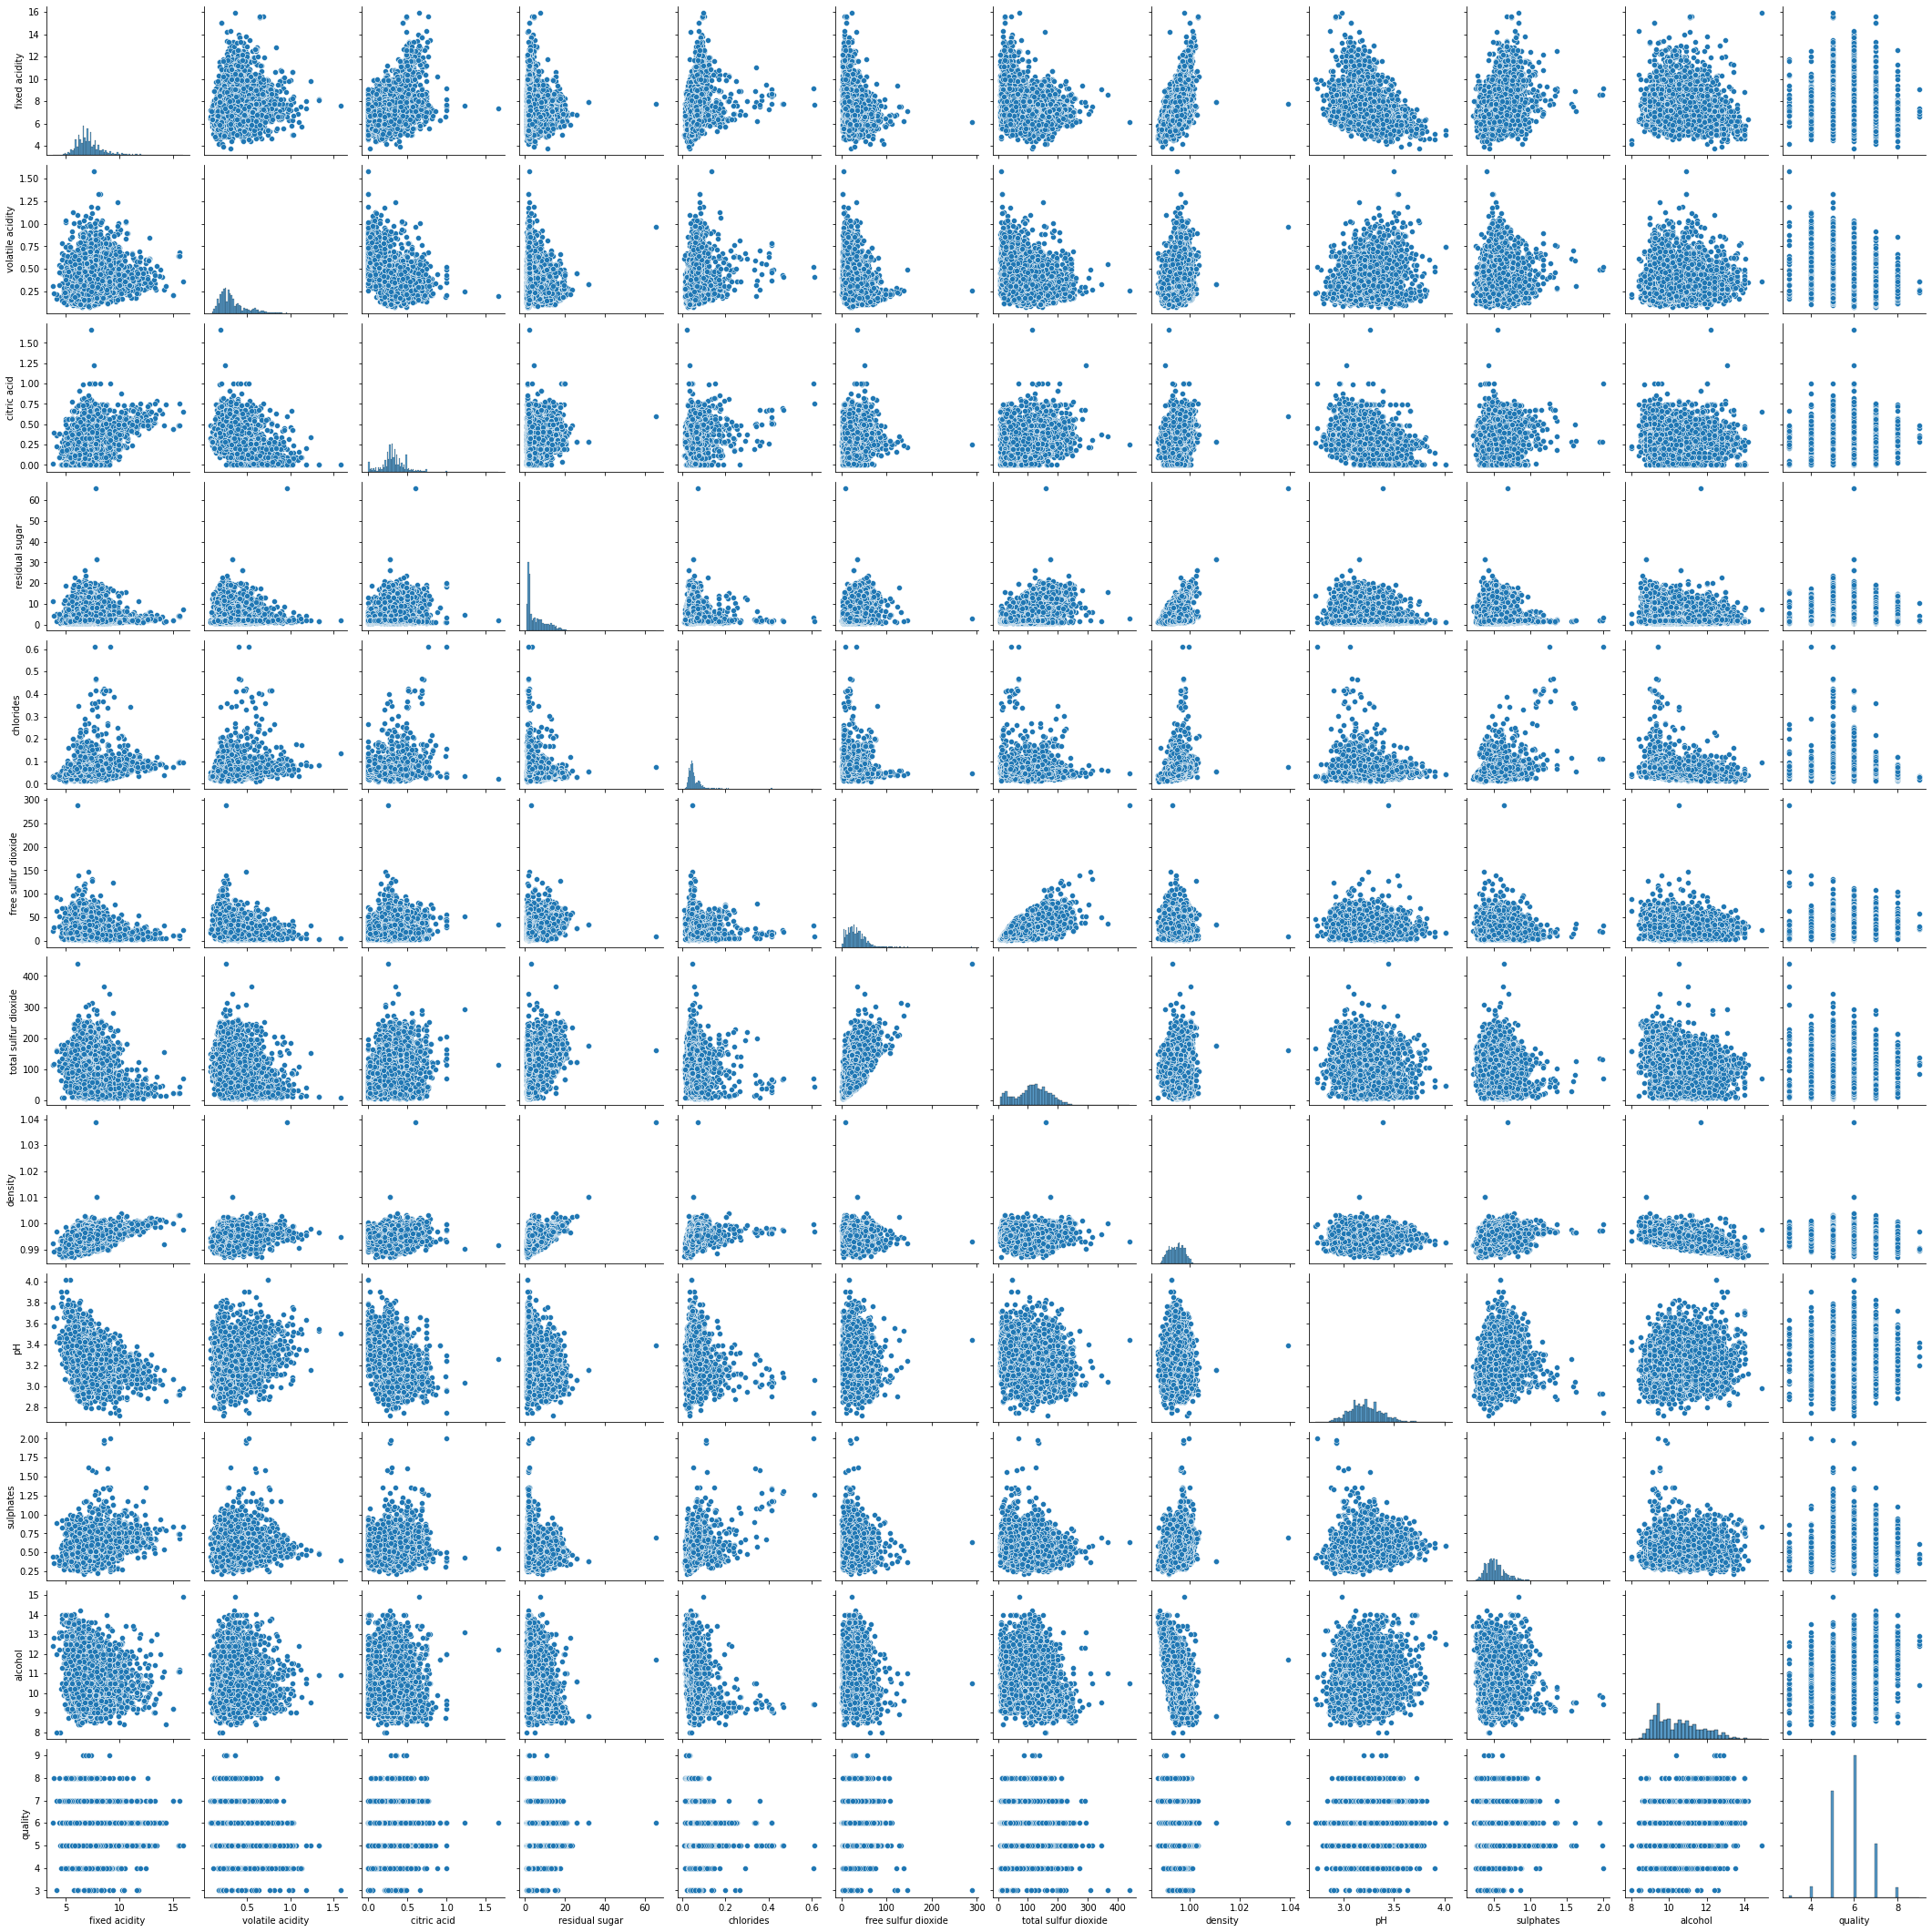

In [21]:
sb.pairplot(df)

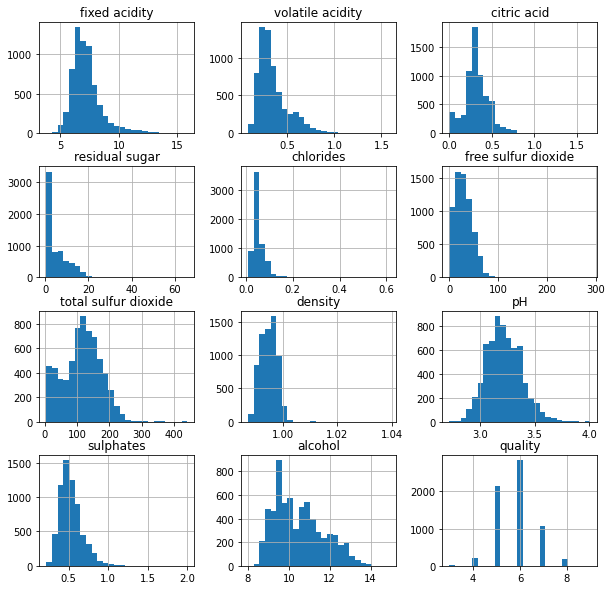

In [22]:
df.hist(bins=25,figsize=(10,10))
plt.show()

Text(0, 0.5, 'alcohol')

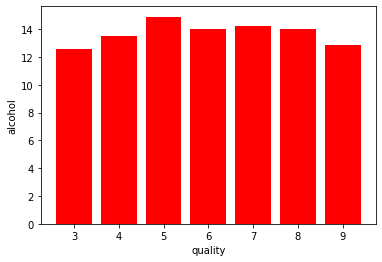

In [25]:
plt.bar(df['quality'],df['alcohol'],color='red')
plt.xlabel('quality')
plt.ylabel('alcohol')

<AxesSubplot:>

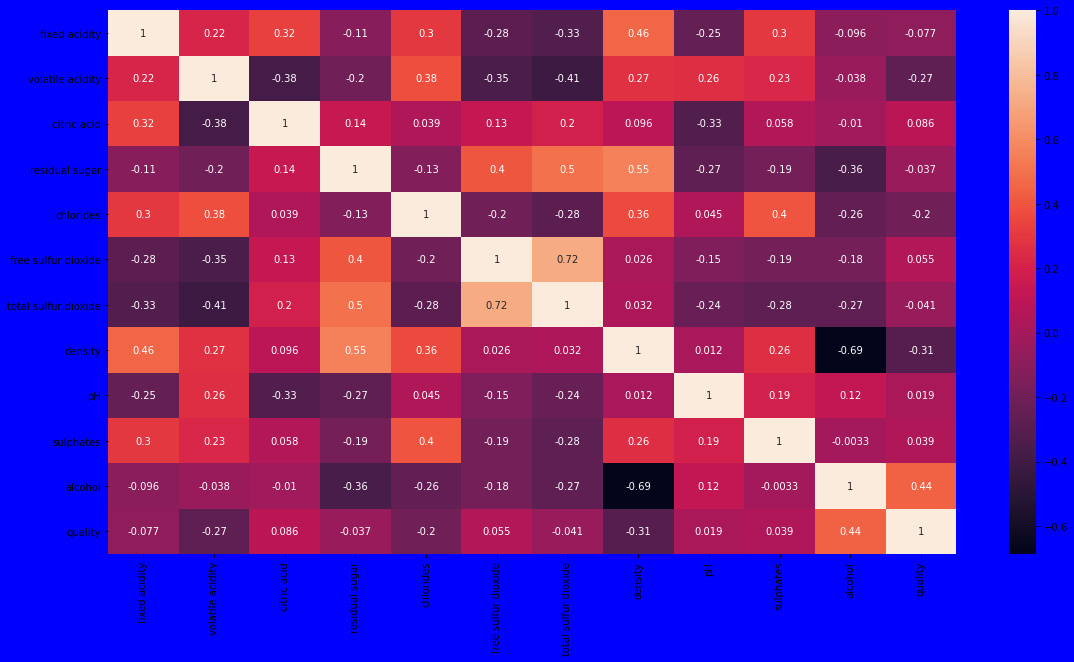

In [24]:
#ploting heatmap
plt.figure(figsize=[19,10],facecolor='blue')
sb.heatmap(df.corr(),annot=True)

In [4]:
for a in range(len(df.corr().columns)):
    for b in range(a):
        if abs(df.corr().iloc[a,b]) >0.7:
            name = df.corr().columns[a]
            print(name)

total sulfur dioxide


In [5]:
new_df=df.drop('total sulfur dioxide',axis=1)

In [6]:
new_df.update(new_df.fillna(new_df.mean()))

In [7]:
# catogerical vars 

next_df = pd.get_dummies(new_df,drop_first=True)

# display new dataframe
next_df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
6492            6.2             0.600         0.08             2.0      0.090   
6493            5.9             0.550         0.10             2.2      0.062   
6494            6.3             0.510         0.13             2.3      0.076   
6495            5.9             0.645         0.12             2.0      0.075   
6496            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  density    pH  sulphates  alcohol  quality  \
0                    45.0  1.00100  3.00   0.450000      8.8        6   
1                    14.0  0.99400  3.30   0.490000      9.5        6   
2                    30.0  0.99510  3.26   0.440000     10.1        6   
3                    47.0  0.99560  3.19   0.400000      9.9        6   
4                    47.0  0.99560  3.19   0.400000      9.9        6   
...                   ...      ...   ...        ...      ...      ...   
6492                 32.0  0.99490  3.45   0.580000     10.5        5   
6493                 39.0  0.99512  3.52   0.531215     11.2        6   
6494                 29.0  0.99574  3.42   0.750000     11.0        6   
6495                 32.0  0.99547  3.57   0.710000     10.2        5   
6496                 18.0  0.99549  3.39   0.660000     11.0        6   

      type_white  
0              1  
1              1  
2              1  
3              1  
4              1  
...          ...  
6492           0  
6493           0  
6494           0  
6495           0  
6496           0  

[6497 rows x 12 columns]

In [8]:
# quality checking

next_df['best quality']=[1 if x>=7 else 0 for x in df.quality]
next_df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
6492            6.2             0.600         0.08             2.0      0.090   
6493            5.9             0.550         0.10             2.2      0.062   
6494            6.3             0.510         0.13             2.3      0.076   
6495            5.9             0.645         0.12             2.0      0.075   
6496            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  density    pH  sulphates  alcohol  quality  \
0                    45.0  1.00100  3.00   0.450000      8.8        6   
1                    14.0  0.99400  3.30   0.490000      9.5        6   
2                    30.0  0.99510  3.26   0.440000     10.1        6   
3                    47.0  0.99560  3.19   0.400000      9.9        6   
4                    47.0  0.99560  3.19   0.400000      9.9        6   
...                   ...      ...   ...        ...      ...      ...   
6492                 32.0  0.99490  3.45   0.580000     10.5        5   
6493                 39.0  0.99512  3.52   0.531215     11.2        6   
6494                 29.0  0.99574  3.42   0.750000     11.0        6   
6495                 32.0  0.99547  3.57   0.710000     10.2        5   
6496                 18.0  0.99549  3.39   0.660000     11.0        6   

      type_white  best quality  
0              1             0  
1              1             0  
2              1             0  
3              1             0  
4              1             0  
...          ...           ...  
6492           0             0  
6493           0             0  
6494           0             0  
6495           0             0  
6496           0             0  

[6497 rows x 13 columns]

In [9]:
x= next_df.drop(['quality','best quality'],axis=1)
y=next_df['best quality']

In [10]:
pd.set_option('display.max_rows',None)
x

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          7.000000          0.270000     0.360000       20.700000   0.045000   
1          6.300000          0.300000     0.340000        1.600000   0.049000   
2          8.100000          0.280000     0.400000        6.900000   0.050000   
3          7.200000          0.230000     0.320000        8.500000   0.058000   
4          7.200000          0.230000     0.320000        8.500000   0.058000   
5          8.100000          0.280000     0.400000        6.900000   0.050000   
6          6.200000          0.320000     0.160000        7.000000   0.045000   
7          7.000000          0.270000     0.360000       20.700000   0.045000   
8          6.300000          0.300000     0.340000        1.600000   0.049000   
9          8.100000          0.220000     0.430000        1.500000   0.044000   
10         8.100000          0.270000     0.410000        1.450000   0.033000   
11         8.600000          0.230000     0.400000        4.200000   0.035000   
12         7.900000          0.180000     0.370000        1.200000   0.040000   
13         6.600000          0.160000     0.400000        1.500000   0.044000   
14         8.300000          0.420000     0.620000       19.250000   0.040000   
15         6.600000          0.170000     0.380000        1.500000   0.032000   
16         6.300000          0.480000     0.040000        1.100000   0.046000   
17         7.216579          0.660000     0.480000        1.200000   0.029000   
18         7.400000          0.340000     0.420000        1.100000   0.033000   
19         6.500000          0.310000     0.140000        7.500000   0.044000   
20         6.200000          0.660000     0.480000        1.200000   0.029000   
21         6.400000          0.310000     0.380000        2.900000   0.038000   
22         6.800000          0.260000     0.420000        1.700000   0.049000   
23         7.600000          0.670000     0.140000        1.500000   0.074000   
24         6.600000          0.270000     0.410000        1.300000   0.052000   
25         7.000000          0.250000     0.320000        9.000000   0.046000   
26         6.900000          0.240000     0.350000        1.000000   0.052000   
27         7.000000          0.280000     0.390000        8.700000   0.051000   
28         7.400000          0.270000     0.480000        1.100000   0.047000   
29         7.200000          0.320000     0.360000        2.000000   0.033000   
30         8.500000          0.240000     0.390000       10.400000   0.044000   
31         8.300000          0.140000     0.340000        1.100000   0.042000   
32         7.400000          0.250000     0.360000        2.050000   0.050000   
33         6.200000          0.120000     0.340000        5.444326   0.045000   
34         5.800000          0.270000     0.200000       14.950000   0.044000   
35         7.300000          0.280000     0.430000        1.700000   0.080000   
36         6.500000          0.390000     0.230000        5.400000   0.051000   
37         7.000000          0.330000     0.320000        1.200000   0.053000   
38         7.300000          0.240000     0.390000       17.950000   0.057000   
39         7.300000          0.240000     0.390000       17.950000   0.057000   
40         6.700000          0.230000     0.390000        2.500000   0.172000   
41         6.700000          0.240000     0.390000        2.900000   0.173000   
42         7.000000          0.310000     0.260000        7.400000   0.069000   
43         6.600000          0.240000     0.270000        1.400000   0.057000   
44         6.700000          0.230000     0.260000        1.400000   0.060000   
45         7.400000          0.180000     0.310000        1.400000   0.058000   
46         6.200000          0.450000     0.260000        4.400000   0.063000   
47         6.200000          0.460000     0.250000        4.400000   0.066000   
48         7.000000          0.310000

final execution time of core 1 is : 8.46732497215271
final execution time of core 2 is : 5.4294633865356445
final execution time of core 3 is : 4.124808311462402
final execution time of core 4 is : 2.9601762294769287
final execution time of core 5 is : 4.560527801513672
final execution time of core 6 is : 3.627286195755005
final execution time of core 7 is : 3.7056264877319336
final execution time of core 8 is : 3.2035210132598877
final execution time of core 9 is : 3.1976828575134277
final execution time of core 10 is : 3.730394124984741


# Splitting the data into training and testing

In [11]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)

# scalling the data

In [12]:
#importing module
from sklearn.preprocessing import MinMaxScaler

# creating normalization object 
norm = MinMaxScaler()
# fit data
norm_fit = norm.fit(xtrain)
new_xtrain = norm_fit.transform(xtrain)
new_xtest = norm_fit.transform(xtest)
# display values
print(new_xtrain)

[[0.23140496 0.11333333 0.21686747 ... 0.10857143 0.17391304 1.        ]
 [0.38842975 0.05333333 0.21084337 ... 0.07428571 0.28985507 1.        ]
 [0.18181818 0.13333333 0.20481928 ... 0.08571429 0.31884058 1.        ]
 ...
 [0.79338843 0.12666667 0.37349398 ... 0.25142857 0.24637681 0.        ]
 [0.4214876  0.21333333 0.30722892 ... 0.38285714 0.7826087  0.        ]
 [0.3553719  0.12666667 0.21084337 ... 0.22857143 0.34782609 1.        ]]


## Linear Regression Model

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 

lr = LinearRegression()
fit_lr = lr.fit(new_xtrain,ytrain)
lr_score = lr.score(new_xtest,ytest)
print('score of model is : ',lr_score)
print('.................................')
y_predict = lr.predict(xtest)
print('calculating the error')
MSE = mean_squared_error(ytest,y_predict)
RMSE = np.sqrt(MSE)
print('mean squared error is : ',MSE)
print('root mean squared error is : ',RMSE)


score of model is :  0.21184507975250255
.................................
calculating the error
mean squared error is :  749.9041484616142
root mean squared error is :  27.3843778176831


## RandomForest Model

In [14]:
# importing modules
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

#creating RandomForestClassifier constructor
rnd = RandomForestClassifier()
# fit data
fit_rnd = rnd.fit(new_xtrain,ytrain)
# predicting score
rnd_score = rnd.score(new_xtest,ytest)
print('score of model is : ',rnd_score)

# display error rate
print('calculating the error')
# calculating mean squared error
rnd_MSE = mean_squared_error(ytest,y_predict)
# calculating root mean squared error
rnd_RMSE = np.sqrt(MSE)
# display MSE
print('mean squared error is : ',rnd_MSE)
# display RMSE
print('root mean squared error is : ',rnd_RMSE)


score of model is :  0.8792307692307693
calculating the error
mean squared error is :  749.9041484616142
root mean squared error is :  27.3843778176831


## prediction of values

In [19]:
x_predict = list(rnd.predict(xtest))

predicted_df = {'predicted_values': x_predict, 'original_values': ytest}

#creating new dataframe

pd.DataFrame(predicted_df)

predicted_values  original_values
3103                 0                1
1419                 0                1
4761                 0                0
4690                 1                0
4032                 1                0
1297                 0                1
1773                 0                0
5584                 0                0
561                  0                0
5946                 0                0
1891                 0                0
2264                 0                0
6485                 0                0
217                  0                0
230                  0                0
2168                 0                1
1400                 0                1
4355                 0                0
4697                 0                1
4295                 0                0
4660                 0                0
5417                 0                0
3270                 0                0
6294                 0                0
2996                 0                1
4147                 0                1
2876                 1                0
2955                 1                0
496                  0                0
828                  0                1
1397                 0                1
2127                 0                0
1263                 0                0
1963                 0                0
706                  1                0
5464                 0                0
1375                 0                1
585                  1                0
4787                 0                1
3326                 0                0
1608                 0                0
96                   0                0
4453                 1                0
3946                 0                0
31                   0                0
2807                 0                0
2104                 1                0
491                  1                1
401                  0                0
5009                 0                0
712                  1                0
1406                 1                1
2957                 1                0
764                  0                0
4161                 0                1
3966                 0                0
538                  1                0
3258                 0                0
3254                 0                0
3100                 1                1
3250                 1                0
5990                 0                0
239                  1                0
2617                 0                1
3413                 0                0
4672                 0                0
23                   0                0
1616                 0                0
6126                 0                1
3733                 0                0
3176                 0                0
1330                 0                0
3289                 0                0
5061                 0                0
5035                 0                0
5972                 0                0
4606                 0                0
4921                 0                0
3443                 0                0
4562                 1                1
503                  0                0
5661                 0                0
1261                 0                0
4608                 0                1
1501                 0                0
3407                 0                0
747                  0                0
544                  0                0
296                  0                0
6020                 0                0
1383                 0                0
4165                 0                1
5027                 0                0
4420                 1                0
435                  1                1
3244                 1                1
1321                 0                0
2585                 0                1
2981                 1                1
132   

In [30]:
from time import time
# importing RepeatedStratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
# importing RandomForestClassifier

In [31]:
## CPU cores we use n_jobs
for core in [1,2,3,4,5,6,7,8,9,10]:
    random = RandomForestClassifier(n_estimators=100)
    # creating object of RepeatedStratifiedKFold
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=4)
    # starting execution time
    start_time=time()
    n_scores =cross_val_score(random,x,y,scoring='accuracy', cv=cv, n_jobs = core)
    # ending time of execution
    end_time=time()
    final_time = end_time-start_time
    # display execution time
    print('final execution time of core {} is : {}'.format(core,final_time))


final execution time of core 1 is : 8.394931554794312
final execution time of core 2 is : 6.269300222396851
final execution time of core 3 is : 4.038689374923706
final execution time of core 4 is : 3.035698890686035
final execution time of core 5 is : 5.220270395278931
final execution time of core 6 is : 3.9336602687835693
final execution time of core 7 is : 3.636809825897217
final execution time of core 8 is : 3.0944454669952393
final execution time of core 9 is : 3.543469190597534
final execution time of core 10 is : 3.3608531951904297


# saving model

In [32]:
import pickle

file = 'wine_quality'
save = pickle.dump(rnd,open(file,'wb'))



## Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tr = DecisionTreeClassifier()
tr_fit = tr.fit(new_xtrain,ytrain)
tr_score = tr.score(new_xtest,ytest)
print('score of model is : ',tr_score)
print('.................................')
y_predict = lr.predict(xtest)
print('calculating the error')
d_MSE = mean_squared_error(ytest,y_predict)
d_RMSE = np.sqrt(MSE)
print('mean squared error is : ',d_MSE)
print('root mean squared error is : ',d_RMSE)

##### now we saw that RandomForest model best fit to our data which gives the best score then   other models

#### now we will doing hyperperameter tuning to increse the accuracy of the model

## Hyperperameter Tuning

In [ ]:
rnd = RandomForestClassifier()

hyp = dict(n_estimators=[20,25,40,60,65],
           criterion =['gini'],
           max_features =['sqrt','auto'],
           max_depth=[x for x in range(10,60,4)],
           bootstrap = ['True','False'],
           random_state = [y for y in range(40,90,8)]
          )

### Grid Search hyperperameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
grd = GridSearchCV(estimator=rnd,
                   param_grid = hyp
                  )
fit_grd = grd.fit(new_xtrain,ytrain)


In [ ]:
fit_grd.best_score_

### Randomize search hyperperameter tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rndom_grd = RandomizedSearchCV(estimator=rnd,
                               param_distributions = hyp,
                               n_iter = 100
                              )
fit_grd = rndom_grd.fit(new_xtrain,ytrain)


In [ ]:
fit_grd.best_score_